In [1]:
import numpy as np
import networkx as nx
import pandas
import matplotlib.pyplot as plt

## Load data

In [2]:
df = pandas.read_csv("data/small.csv")
df[:5]

,age,portembarked,fare,numparentschildren,passengerclass,sex,numsiblings,survived
0,1,1,1,1,1,1,1,1
1,2,2,1,1,2,2,1,2
2,1,1,1,1,1,2,1,2
3,2,1,1,1,2,2,1,2
4,2,1,1,1,1,1,1,1


In [3]:
column_names = list(df.columns)
data = np.array(df)
node_info = [(column_names[i], (np.min(data[:,i]), np.max(data[:,i]))) for i in range(data.shape[1])]
print(node_info)

[('age', (1, 3)), ('portembarked', (1, 3)), ('fare', (1, 3)), ('numparentschildren', (1, 3)), ('passengerclass', (1, 3)), ('sex', (1, 2)), ('numsiblings', (1, 3)), ('survived', (1, 2))]


## BayesNet Datastructure

In [28]:
class BayesNet:
    
    def __init__(self, adjacency_matrix, node_info):
        self.adjacency_matrix = adjacency_matrix
        self.G = nx.convert_matrix.from_numpy_array(self.adjacency_matrix, create_using=nx.DiGraph())
        self.node_info = node_info
        self.n_nodes = len(self.node_info)
        vals_per_node = [vals[1] for name, vals in node_info]
        parent_sets = [list(self.G.predecessors(i)) for i in self.G.nodes]
        
        n_parental_instances = [np.prod([vals_per_node[p] for p in parents]) for parents in parent_sets]
        m_matrices = [np.zeros((int(npis), int(vals))) for npis, vals in zip(n_parental_instances, vals_per_node)]
        
        self.ms = m_matrices
    
    def 
    
    @property
    def is_dag(self):
        return nx.is_directed_acyclic_graph(self.G)
    
    def draw(self):
        nx.draw(self.G, labels={i:info[0] for i, info in enumerate(self.node_info)})
        
        

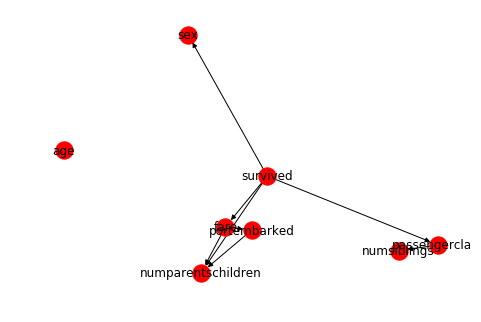

In [31]:
no_dag = True
while no_dag:    
    A = np.random.binomial(1, 0.1, size=[len(node_info)] * 2)
    np.fill_diagonal(A, 0)
    g = BayesNet(A, node_info)
    no_dag = not g.is_dag
g.draw()

In [ ]:
G = nx.DiGraph()
G.add_edge(1,2)
G.add_edge(3,4)
G.add_edge(4,1)
nx.draw(G, labels={i+1:str(i + 1) for i in range(4)})

In [46]:
A = nx.to_numpy_array(G)

In [68]:
parents = [G.predecessors(node) for node in G.nodes]


[4]